In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [8]:

path = r'IR-assignment-2-data (2).txt' 
df = pd.read_csv(path, sep=' ', header=None)


In [9]:
file = open(path,encoding="unicode_escape",mode='r')
file_data = file.readlines()

In [10]:
file_data

['0 qid:4 1:3 2:0 3:2 4:0 5:3 6:1 7:0 8:0.666667 9:0 10:1 11:999 12:0 13:110 14:5 15:1114 16:14.976692 17:28.949002 18:25.594644 19:28.531344 20:14.972391 21:20 22:0 23:5 24:0 25:25 26:1 27:0 28:0 29:0 30:1 31:12 32:0 33:4 34:0 35:16 36:6.666667 37:0 38:1.666667 39:0 40:8.333333 41:20.222222 42:0 43:2.888889 44:0 45:37.555556 46:0.02002 47:0 48:0.045455 49:0 50:0.022442 51:0.001001 52:0 53:0 54:0 55:0.000898 56:0.012012 57:0 58:0.036364 59:0 60:0.014363 61:0.006673 62:0 63:0.015152 64:0 65:0.007481 66:0.00002 67:0 68:0.000239 69:0 70:0.00003 71:77.577533 72:0 73:30.667985 74:0 75:90.53171 76:5.52713 77:0 78:0 79:0 80:5.526745 81:57.882066 82:0 83:18.750101 84:0 85:66.125373 86:25.859178 87:0 88:10.222662 89:0 90:30.177237 91:525.177766 92:0 93:60.031269 94:0 95:675.850674 96:1 97:0 98:0 99:0 100:1 101:0.875901 102:0 103:0.66135 104:0 105:0.864571 106:28.756809 107:0 108:3.274639 109:0 110:28.985515 111:-17.640291 112:-29.251906 113:-20.596041 114:-31.107208 115:-17.519629 116:-19.44092

In [11]:
rslt_df = df[df[1] == "qid:4"] 

print(rslt_df[0].unique())

[0 1 3 2]


59
26
1
17
Maximum DCG ordering possible for queries with qid:4 : 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000
nDCG Value at 50: 0.35612494416255847
nDCG for the Whole Dataset: 0.5784691984582591


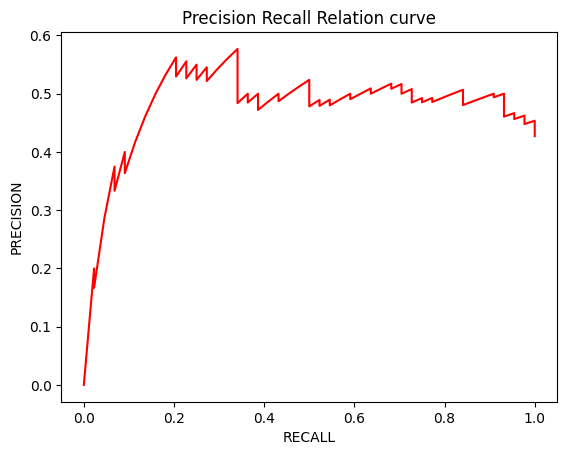

In [12]:
res = 1
l = []

for val in rslt_df[0].unique():
    l.append(len(rslt_df[rslt_df[0]==val]))
    print(len(rslt_df[rslt_df[0]==val]))
    
    res = res * math.factorial(len(rslt_df[rslt_df[0]==val]))
dfr = rslt_df.sort_values(by = 0, ascending = False )
dfr = dfr.reset_index(drop=True)

#total files that can be made are 1!17!29!59!

dfr.to_csv('maxDCG.csv')

print("Maximum DCG ordering possible for queries with qid:4 :",res)

def dcgAtK(df, k):
    result = 0;
    for i in range(1, k+1):
        result = result + (pow(2, df[0][i-1]) - 1)/(np.log2(i+1))
    return result


k = 50
print("nDCG Value at 50:",dcgAtK(rslt_df,k)/dcgAtK(dfr,k))
k = len(rslt_df)
print("nDCG for the Whole Dataset:",dcgAtK(rslt_df,k)/dcgAtK(dfr,k))


feedback=[]
feature_score=[]
i=0
for line in file_data:
    i+=1
    if line[line.find("qid:")+4:line.find("1:")-1]=="4":
        pos=line.find("75:")
        pos1=line.find("76:")
        
        feedback.append(int(line[0]))
        
        feature_score.append(float(line[pos+3:pos1-1]))
        if float(line[pos+3:pos1-1])==0.0:
            print(line)
            
            
final = [x for _,x in sorted(zip(feature_score,feedback),reverse=True)]
relevence=0
for elem in final:
    if elem!=0:
        relevence+=1
precision=[]
recall=[]
count=0
rel=0
#print(final)
for elem in final:
    count+=1
    if elem!=0:
        rel+=1
    precision.append(rel/count)
    recall.append(rel/relevence)
plt.plot(recall,precision,color='red')
plt.title("Precision Recall Relation curve")
plt.xlabel("RECALL")
plt.ylabel("PRECISION")
plt.show()